In [167]:
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.electronic_structure.bandstructure import BandStructureSymmLine
import matplotlib.pyplot as plt 
import numpy as np
import itertools

In [168]:
# Structure de bande 

with MPRester("TL5oMzFNQZwCXV0W") as m:
    
    bandstructure = m.get_bandstructure_by_material_id("mp-754555")
    gap = bandstructure.get_band_gap()
    vbm = bandstructure.get_vbm() # Maximum de la bande de valence
    cbm = bandstructure.get_cbm() # Minimum de bande de conduction

# 1 Bande interdite

In [169]:
print("La bande interdite se trouve entre le maximum de la bande de valence ({} eV), et le minimum de la bande de conduction ({} eV).".format(bandstructure.efermi+vbm['energy'],bandstructure.efermi+cbm['energy']))


# Energie

print("Energie : {} eV".format(bandgap['energy']))


# Bande directe

if gap['direct'] == False:
    rep = "non"
else:
    rep = "oui"
print("Bande directe? : {}".format(rep)) 


# Transition

print("Transition : {}".format(gap['transition']))

La bande interdite se trouve entre le maximum de la bande de valence (7.231527740000001 eV), et le minimum de la bande de conduction (8.65772774 eV).
Energie : 1.4262000000000001 eV
Bande directe? : non
Transition : Z-F


Indice bande de valence: 16

Indice bande de conduction: 17


Comparaison entre les données stockées dans les bandvalues et energie:


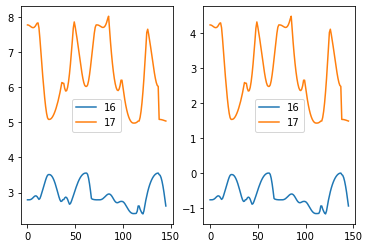

On voit qu'on obtient la même information en comparant les données de différentes manières.

Energie en fonction du vecteur d'onde:


<module 'matplotlib.pyplot' from '/usr/local/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

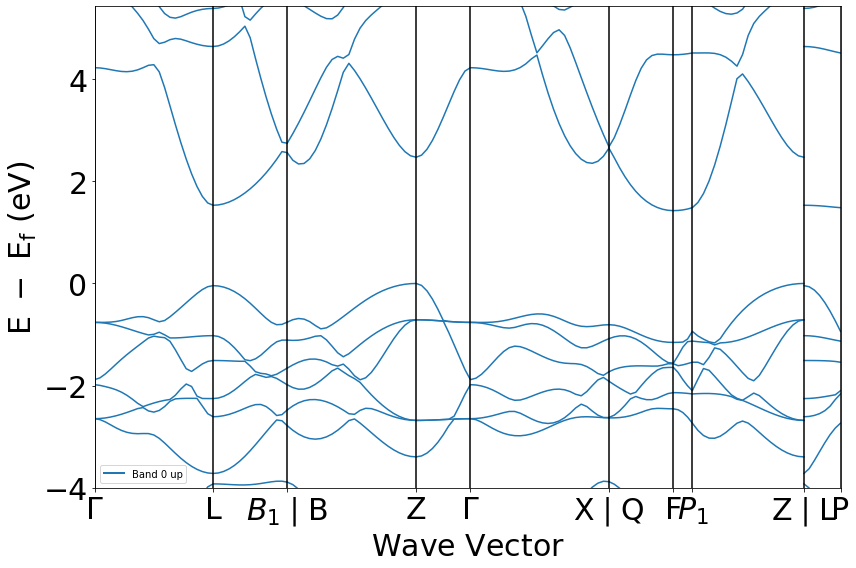

In [170]:
plotter = BSPlotter(bandstructure)
data = plotter.bs_plot_data()

# Indices des bandes de valence et de conduction

bande_val_ind = list(vbm['band_index'].values())[0]
bande_cond_ind = list(cbm['band_index'].values())[0]
print("Indice bande de valence: {}\n".format(bande_val_ind[0]))
print("Indice bande de conduction: {}\n".format(bande_cond_ind[0])) 


# Energies par chemin

chem_energie_16 = []
chem_energie_17 = []

for i in range(0,9) : 
    chem_energie_16.append(data['energy']['1'][i][16])
    chem_energie_17.append(data['energy']['1'][i][17])
    
energie_16 = list(itertools.chain.from_iterable(chem_energie_16))
energie_17 = list(itertools.chain.from_iterable(chem_energie_17))

bandvalues = list(bandstructure.bands.values())[0]


# Représentation des bandes de valence et de conduction 

a = np.arange(0,146)
fig,(x, y) = plt.subplots(1,2)

print("\nComparaison entre les données stockées dans les bandvalues et energie:")

x.plot(a, bandvalues[16], label = '16')
x.plot(a, bandvalues[17], label = '17')
x.legend()

y.plot([i for i in range(len(energie_16))], energie_16, label = '16')
y.plot([i for i in range(len(energie_16))], energie_17, label = '17')
y.legend()

plt.show()

print("On voit qu'on obtient la même information en comparant les données de différentes manières.")


# Graphe du module BSPlotter

print("\nEnergie en fonction du vecteur d'onde:")
plotter.get_plot()

# 2 Dispersion

On va maintenant étudier la dispersion, d'abord de manière locale (en calculant la pente entre chaque abscisse), puis de manière globale (en calculant la pente entre les deux points extrêmes d'un même chemin).

# 2.1 Dispersion locale

Bande de valence:
La plus grande dispersion est entre les points 3.05826928598416 et 3.10660626935731 sur le chemin 3.
La plus petite dispersion est entre les points 1.056469217289502 et 1.103629091676191 sur le chemin 1.

Bande de conduction:
La plus grande dispersion est entre les points 5.673399770839374 et 5.723118904235631 sur le chemin 7.
La plus petite dispersion est entre les points 1.056469217289502 et 1.103629091676191 sur le chemin 1.


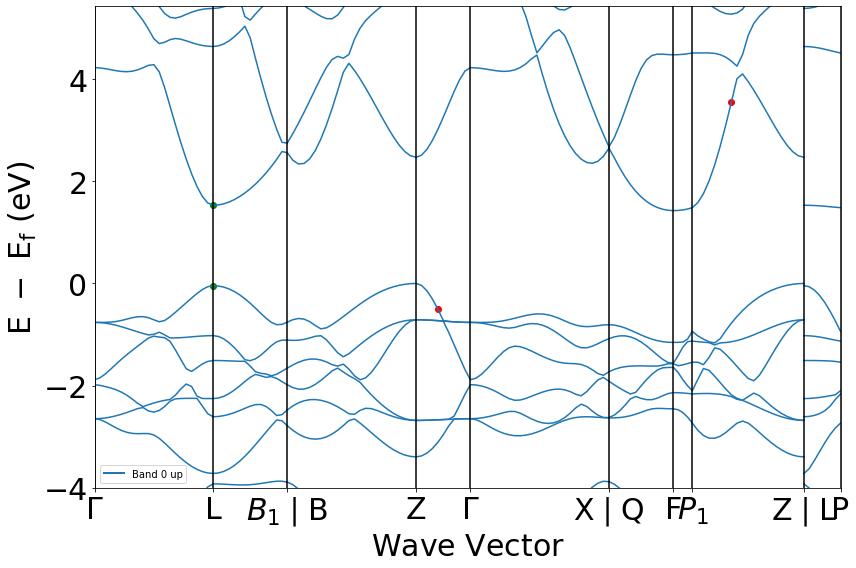

In [171]:
# Abscisses par chemin

distances = data['distances']


# Abscisses des dispersions maximales et minimales pour les bandes 16 et 17

disp_min_16 = 10000000000
disp_max_16 = 0
disp_max_17 = 0 
disp_min_17 = 10000000000
k_16_min = [0,0]
k_16_max = [0,0]
k_17_min = [0,0]
k_17_max = [0,0]
delta_16 = 0
delta_17 = 0
delta_k = 0 
count = 0

for i in range(len(distances)-1) : # On ne considère pas le dernier chemin qui présente une discontinuité
    
    for j in range(len(distances[i])) : 
        
        if i != len(distances)-2 and j == len(distances[i])-1 : 
            k1 = distances[i][j]
            k2 = distances[i+1][1]
            delta_k = abs(k1 - k2)
            
        elif i == len(distances)-2 and j == len(distances[i])-1 : 
            break
            
        else :
            k1 = distances[i][j]
            k2 = distances[i][j+1]
            delta_k = abs(k1 - k2)
            
        delta_16 = abs(energie_16[count] - energie_16[count+1])
        delta_17 = abs(energie_17[count] - energie_17[count+1])
        disp_16 = delta_16 / delta_k
        disp_17 = delta_17 / delta_k
        
            
        if disp_min_16 > disp_16 : 
            disp_min_16 = disp_16
            k_16_min[0] = k1
            k_16_min[1] = k2
            
        if disp_max_16 < disp_16 :
            disp_max_16 = disp_16
            k_16_max[0] = k1
            k_16_max[1] = k2
            
        if disp_min_17 > disp_17 : 
            disp_min_17 = disp_17
            k_17_min[0] = k1
            k_17_min[1] = k2
            
        if disp_max_17 < disp_17 :
            disp_max_17 = disp_17
            k_17_max[0] = k1
            k_17_max[1] = k2
            
        count += 1
        
        
# Chemins qui contiennent les dispersions minimales et maximales

chem_min_16 = 20
chem_max_16 = 20
chem_max_17 = 20
chem_min_17 = 20

for chem in range(len(distances)) : 
    try : 
        chem_min_16 = list(distances[chem]).index(k_16_min[0])
        chem_min_16 = [chem, chem_min_16]
    except : 
        continue

for chem in range(len(distances)) : 
    try : 
        chem_max_16 = list(distances[chem]).index(k_16_max[0])
        chem_max_16 = [chem, chem_max_16]
    except : 
        continue
        
for chem in range(len(distances)) : 
    try : 
        chem_min_17 = list(distances[chem]).index(k_17_min[0])
        chem_min_17 = [chem, chem_min_17]
    except : 
        continue
        
for chem in range(len(distances)) : 
    try : 
        chem_max_17 = list(distances[chem]).index(k_17_max[0])
        chem_max_17 = [chem, chem_max_17]
    except : 
        continue


# Dispersions minimales et maximales pour les bandes de valence et de conduction
        
print("Bande de valence:")
print("La plus grande dispersion est entre les points {} et {} sur le chemin {}.".format(k_16_max[0], k_16_max[1], chem_max_16[0]))
print("La plus petite dispersion est entre les points {} et {} sur le chemin {}.".format(k_16_min[0], k_16_min[1], chem_min_16[0]))
print("\nBande de conduction:")
print("La plus grande dispersion est entre les points {} et {} sur le chemin {}.".format(k_17_max[0], k_17_max[1], chem_max_17[0]))
print("La plus petite dispersion est entre les points {} et {} sur le chemin {}.".format(k_17_min[0], k_17_min[1], chem_min_17[0]))


# Code pour plotter la figure ci-dessous

plotter.get_plot()
plt.scatter(k_17_max[0], chem_energie_17[chem_max_17[0]][chem_max_17[1]], c = 'r')
plt.scatter(k_17_min[0], chem_energie_17[chem_min_17[0]][chem_min_17[1]], c = 'g')
plt.scatter(k_16_max[0], chem_energie_16[chem_max_16[0]][chem_max_16[1]], c = 'r')
plt.scatter(k_16_min[0], chem_energie_16[chem_min_16[0]][chem_min_16[1]], c = 'g')

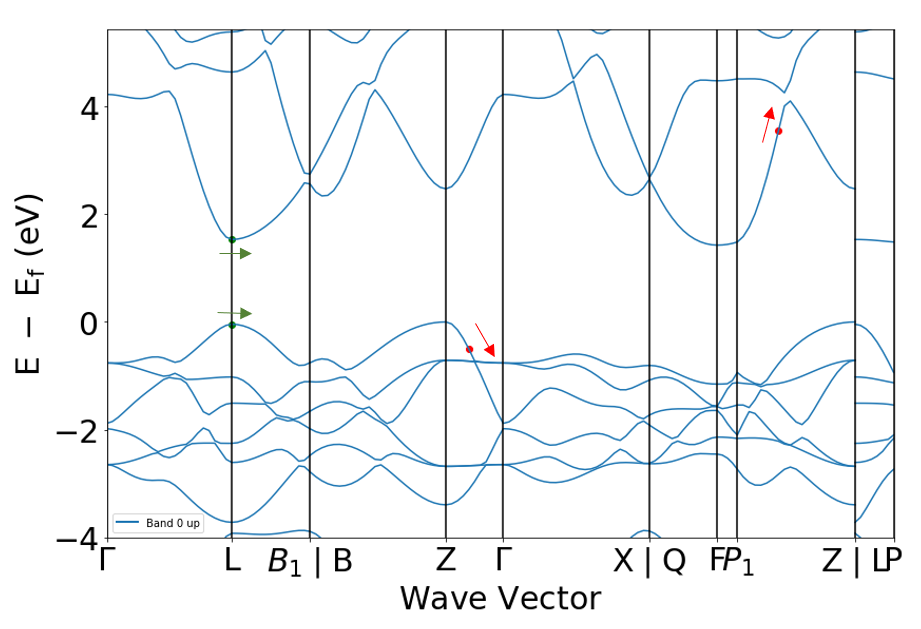

# 2.2 Dispersion globale

Bande de valence :
La plus petite dispersion est sur le chemin 4.
La plus grande dispersion est sur le chemin 8.

Bande de conduction :
La plus petite dispersion est sur le chemin 2.
La plus grande dispersion est sur le chemin 3.


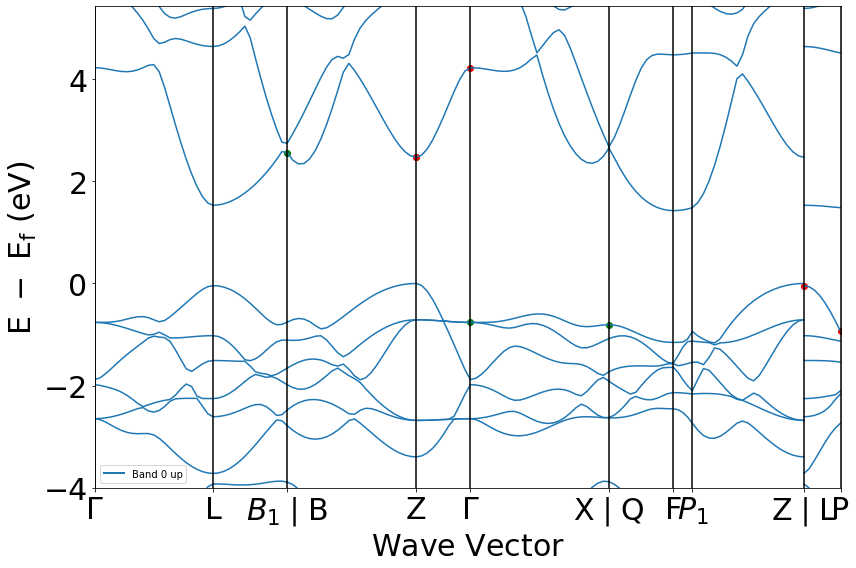

In [172]:
# Tuples des dispersions pour chaque chemin:

dispersions16 = [] # sur la bande de valence
dispersions17 = [] # sur la bande de conduction 

for i in range(len(distances)) : #cette fois on prend en compte le dernier chemin
    delta_k = abs(distances[i][-1] - distances[i][1])
    dispersions16.append(abs(chem_energie_16[i][0] - chem_energie_16[i][-1]) / delta_k)
    dispersions17.append(abs(chem_energie_17[i][0] - chem_energie_17[i][-1]) / delta_k)
    
    
# Chemins de plus grande/petite dispersion sur les deux bandes 

chem_min_16 = list(dispersions16).index(min(dispersions16))
chem_max_16 = list(dispersions16).index(max(dispersions16))
chem_min_17 = list(dispersions17).index(min(dispersions17))
chem_max_17 = list(dispersions17).index(max(dispersions17))

print("Bande de valence :")
print("La plus petite dispersion est sur le chemin {}.".format(chem_min_16))
print("La plus grande dispersion est sur le chemin {}.".format(chem_max_16))
print("\nBande de conduction :")
print("La plus petite dispersion est sur le chemin {}.".format(chem_min_17))
print("La plus grande dispersion est sur le chemin {}.".format(chem_max_17))


# Graphe ci-dessous

plotter.get_plot()
plt.scatter(distances[chem_min_16][0], chem_energie_16[chem_min_16][0], c='g')
plt.scatter(distances[chem_min_16][-1], chem_energie_16[chem_min_16][-1], c='g')
plt.scatter(distances[chem_max_16][0], chem_energie_16[chem_max_16][0], c='r')
plt.scatter(distances[chem_max_16][-1], chem_energie_16[chem_max_16][-1], c='r')
plt.scatter(distances[chem_min_17][0], chem_energie_17[chem_min_17][0], c='g')
plt.scatter(distances[chem_min_17][-1], chem_energie_17[chem_min_17][-1], c='g')
plt.scatter(distances[chem_max_17][0], chem_energie_17[chem_max_17][0], c='r')
plt.scatter(distances[chem_max_17][-1], chem_energie_17[chem_max_17][-1], c='r')

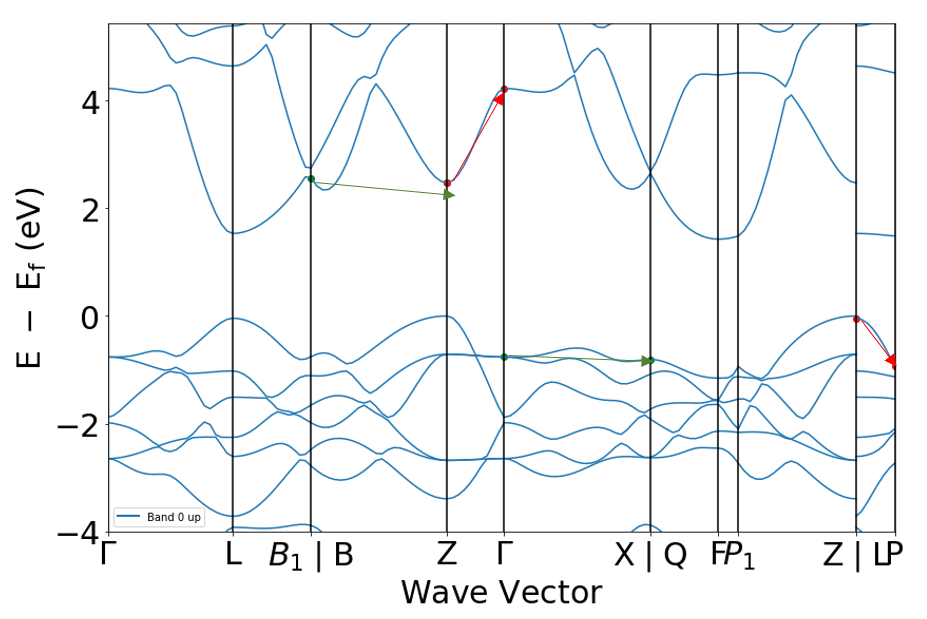

# 3 Masse effective

On va choisir ici l'interprétation d'une dispersion parabolique locale (en prenant trois points : l'extrema de la bande et ses deux voisins les plus proches). En effet, parler d'une dispersion parabolique globale (sur l'ensemble du chemin comprenant l'extrema) semble moins pertinent ici car les extrema se trouvent pour les deux bandes en un point entre deux chemins distincts.

La masse effective s'obtient par la formule:$$m^* = \hbar^2\left(\frac{\partial^2E}{\partial k^2}\right)^{-1} $$avec $E(k) = ak^2 + bk + c$ sous l'hypothèse d'une dispersion parabolique, et où $a, b, c$ sont à déterminer.

In [173]:
# Tuples (k,E) des extrema des bandesdevalence et de condution

print("Tuples (k,E) des extrema des bandes de valence:")
print(data['vbm'])
print("\n")
print("Tuples (k,E) des extrema des bandes de conduction:")
print(data['cbm'])


# Vérification que les extrema des bandes de valence et de conduction sont bien respectivement sur les chemins 3 et 5

# idxonpath3 = list(distances[3]).index(data['vbm'][1][0])
# idxonpath5 = list(distances[5]).index(data['cbm'][1][0])

Tuples (k,E) des extrema des bandes de valence:
[(2.86492135249156, 0.0), (2.86492135249156, 0.0), (6.319748337933056, 0.0)]


Tuples (k,E) des extrema des bandes de conduction:
[(5.1567433654621215, 1.4262000000000001), (5.1567433654621215, 1.4262000000000001)]


 Pour la bande de valence, on prend comme maximum le point (6.319748337933056, 0.0).
 
 Pour la bande de conduction, on prend comme minimum le point (5.1567433654621215, 1.4262000000000001).

On va maintenant interpoler ces deux points et leurs deux voisins les plus proches avec de la fonction polyfit de numpy.

Dispersion parabolique locale autour du sommet de la dernière bande de valence:
E(k) = 0.17116072551857672 x^2 + -1.1627442156364478 x + 1.2121140952173042 [eV]

Masse effective au sommet de la dernière bande de valence:
m* = -5.940392464727611e-31 [kg]

Dispersion parabolique locale autour de la base de la première bande de conduction:
E(k) = 2.4786053680000757 x^2 + -25.584525133798056 x + 67.4479509989854 [eV]

Masse effective à la base de la première bande de conduction:
m* = 8.60237569482785e-30 [kg]


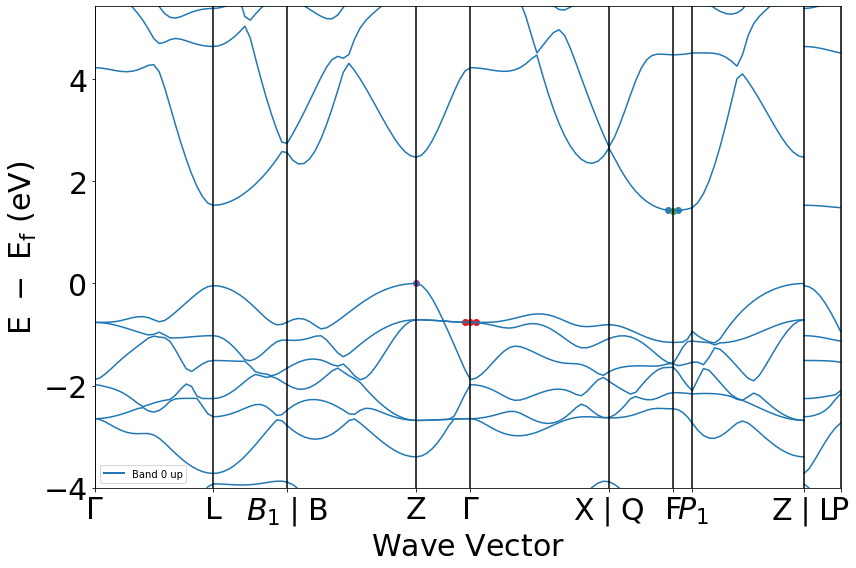

In [174]:
# Bande de valence

X = [distances[3][-2], distances[3][-1], distances[4][1]]    
Y = [chem_energie_16[3][-2], chem_energie_16[3][-1], chem_energie_16[4][1]]    
a = np.polyfit(X,Y,2)[0]
b = np.polyfit(X,Y,2)[1]
c = np.polyfit(X,Y,2)[2]
print("Dispersion parabolique locale autour du sommet de la dernière bande de valence:")
print("E(k) = {} x^2 + {} x + {} [eV]\n".format(a, b, c))
print("Masse effective au sommet de la dernière bande de valence:")
m_v = ((1.054571817 * 10**(-34))**2) * (-1/2 * (a)) * (10**20) * (10**19) / 1.60218
print("m* = {} [kg]\n".format(m_v))


# Graphe ci-dessous

plotter.get_plot()
plt.scatter(X,Y)


# Bande de conduction 

X = [distances[5][-2], distances[5][-1], distances[6][1]]       
Y = [chem_energie_17[5][-2], chem_energie_17[5][-1], chem_energie_17[6][1]]   
a = np.polyfit(X,Y,2)[0]
b = np.polyfit(X,Y,2)[1]
c = np.polyfit(X,Y,2)[2]
print("Dispersion parabolique locale autour de la base de la première bande de conduction:")
print("E(k) = {} x^2 + {} x + {} [eV]\n".format(a, b, c))
print("Masse effective à la base de la première bande de conduction:")
m_c = ((1.054571817 * 10**(-34))**2) * (1/2 * (a)) * (10**20) * (10**19) / 1.60218
print("m* = {} [kg]".format(m_c))


# Graphe ci-dessous

plt.scatter(X,Y)
plt.scatter(data['cbm'][0][0], data['cbm'][0][1])
plt.scatter(data['vbm'][1][0], data['vbm'][1][1])

On obtient bien une masse effective négative pour le maximum de la bande de valence, et une masse effective positive pour le minimum de la bande de conduction.